In [4]:
import numpy as np
from astropy.stats import RipleysKEstimator
import matplotlib.pyplot as plt

from spatial_pp import SPP_HomPoisson, SPP_Thomas

## Simulation envelopes to compare Thomas with Poisson

In [137]:
r = np.linspace(0, 0.25, 100)
Kest = RipleysKEstimator(area = 1, x_max = 1, y_max= 1, x_min = 0, y_min = 0)

print("Computing Poisson.")

pois = SPP_HomPoisson()
pois_spp = pois.simSPP(500)

Kest_arr_pois = Kest(data=pois_spp, radii=r)

for i in range(999):
    pois_spp_sim = pois.simSPP(500)
    Kest_arr_pois = np.vstack([Kest_arr_pois, Kest(data=pois_spp_sim, radii=r)])

Kest_min_max_pois = (
    np.vstack((np.amin(Kest_arr_pois, axis=0), np.amax(Kest_arr_pois, axis=0)))
)

print("Computing Thomas.")

Kest_tom_list = []

for sigma in [0.01, 0.05, 0.1, 0.25, 0.5]:
    print(f"sigma: {sigma}")
    tom = SPP_Thomas()
    tom_spp = tom.simSPP(50, 10, sigma, np.array([[1, 0], [0, 1]]), 1.25)

    Kest_arr_tom = Kest(data=tom_spp, radii=r)
    for i in range(999):
        tom_spp_sim = tom.simSPP(50, 10, sigma, np.array([[1, 0], [0, 1]]), 1.25)
        Kest_arr_tom = np.vstack([Kest_arr_tom, Kest(data=tom_spp_sim, radii=r)])

    Kest_min_max_tom = (
        np.vstack((np.amin(Kest_arr_tom, axis=0), np.amax(Kest_arr_tom, axis=0)))
    )

    Kest_tom_list.append(Kest_min_max_tom)

Computing Poisson.
Computing Thomas.
sigma: 0.01
sigma: 0.05
sigma: 0.1
sigma: 0.25
sigma: 0.5


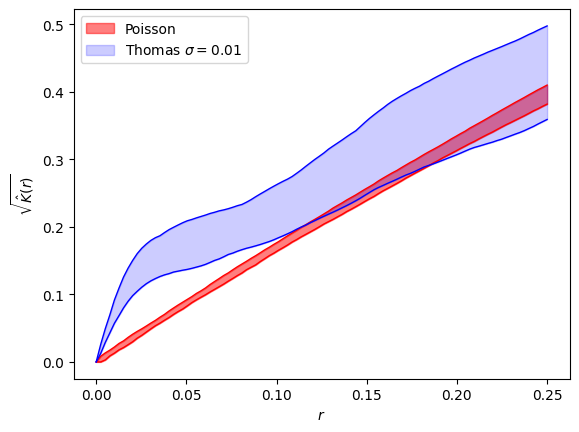

In [180]:
fig, ax = plt.subplots()

line1 = ax.fill_between(r, 
                np.sqrt(Kest_min_max_pois[0, :]), 
                np.sqrt(Kest_min_max_pois[1, :]), 
                alpha=0.5,
                color='r')
ax.plot(r, np.sqrt(Kest_min_max_pois[0, :]), linestyle='-', linewidth=1, color='red')
ax.plot(r, np.sqrt(Kest_min_max_pois[1, :]), linestyle='-', linewidth=1, color='red')

line2 = ax.fill_between(r, 
                np.sqrt(Kest_tom_list[0][0, :]), 
                np.sqrt(Kest_tom_list[0][1, :]), 
                alpha=0.2,
                color='b')
ax.plot(r, np.sqrt(Kest_tom_list[0][0, :]), linestyle='-', linewidth=1, color='b')
ax.plot(r, np.sqrt(Kest_tom_list[0][1, :]), linestyle='-', linewidth=1, color='b')


# line2 = ax.fill_between(r, 
#                 np.sqrt(Kest_tom_list[1][0, :]), 
#                 np.sqrt(Kest_tom_list[1][1, :]), 
#                 alpha=0.2,
#                 color='b')  
# ax.plot(r, np.sqrt(Kest_tom_list[1][0, :]), linestyle='-', linewidth=1, color='b')
# ax.plot(r, np.sqrt(Kest_tom_list[1][1, :]), linestyle='-', linewidth=1, color='b')

# line2 = ax.fill_between(r, 
#                 np.sqrt(Kest_tom_list[2][0, :]), 
#                 np.sqrt(Kest_tom_list[2][1, :]), 
#                 alpha=0.2,
#                 color='b') 
# ax.plot(r, np.sqrt(Kest_tom_list[2][0, :]), linestyle='-', linewidth=1, color='b')
# ax.plot(r, np.sqrt(Kest_tom_list[2][1, :]), linestyle='-', linewidth=1, color='b')

# line2 = ax.fill_between(r, 
#                 np.sqrt(Kest_tom_list[3][0, :]), 
#                 np.sqrt(Kest_tom_list[3][1, :]), 
#                 alpha=0.2,
#                 color='b')  
# ax.plot(r, np.sqrt(Kest_tom_list[3][0, :]), linestyle='-', linewidth=1, color='b')
# ax.plot(r, np.sqrt(Kest_tom_list[3][1, :]), linestyle='-', linewidth=1, color='b')

# line2 = ax.fill_between(r, 
#                 np.sqrt(Kest_tom_list[4][0, :]), 
#                 np.sqrt(Kest_tom_list[4][1, :]), 
#                 alpha=0.2,
#                 color='b')  
# ax.plot(r, np.sqrt(Kest_tom_list[4][0, :]), linestyle='-', linewidth=1, color='b')
# ax.plot(r, np.sqrt(Kest_tom_list[4][1, :]), linestyle='-', linewidth=1, color='b')

ax.legend([line1, line2], ['Poisson', r'Thomas $\sigma = 0.01$'])
ax.set_xlabel(r'$r$');
ax.set_ylabel(r'$\sqrt{\hat{K}(r)}$');
plt.savefig("Plots/Goodness of Fit Plots/kenv_sig_001.pdf")

## Simulation envelopes to compare Thomas processes

In [297]:
r = np.linspace(0, 0.25, 100)
Kest = RipleysKEstimator(area = 1, x_max = 1, y_max= 1, x_min = 0, y_min = 0)

print("Computing Thomas1.")

tom = SPP_Thomas()
tom1_spp = tom.simSPP(100, 5, 0.01, np.array([[1, 0], [0, 1]]), 1.25)

Kest_arr_tom1 = Kest(data=tom1_spp, radii=r)

for i in range(999):
    tom1_spp_sim = tom.simSPP(100, 5, 0.01, np.array([[1, 0], [0, 1]]), 1.25)
    Kest_arr_tom1 = np.vstack([Kest_arr_tom1, Kest(data=tom1_spp_sim, radii=r)])

Kest_min_max_tom1 = (
    np.vstack((np.amin(Kest_arr_tom1, axis=0), np.amax(Kest_arr_tom1, axis=0)))
)

print("Computing Thomas2.")

Kest_tom_list = []

tom = SPP_Thomas()
tom2_spp = tom.simSPP(50, 10, 0.01, np.array([[1, 0], [0, 1]]), 1.25)

Kest_arr_tom2 = Kest(data=tom1_spp, radii=r)

for i in range(999):
    tom2_spp_sim = tom.simSPP(50, 10, 0.01, np.array([[1, 0], [0, 1]]), 1.25)
    Kest_arr_tom2 = np.vstack([Kest_arr_tom2, Kest(data=tom2_spp_sim, radii=r)])

Kest_min_max_tom2 = (
    np.vstack((np.amin(Kest_arr_tom2, axis=0), np.amax(Kest_arr_tom2, axis=0)))
)


Computing Thomas1.
Computing Thomas2.


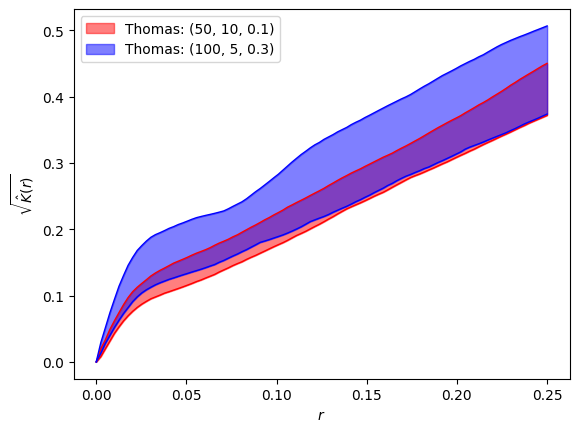

In [298]:
fig, ax = plt.subplots()

line1 = ax.fill_between(r, 
                np.sqrt(Kest_min_max_tom1[0, :]), 
                np.sqrt(Kest_min_max_tom1[1, :]), 
                alpha=0.5,
                color='r')
ax.plot(r, np.sqrt(Kest_min_max_tom1[0, :]), linestyle='-', linewidth=1, color='r')
ax.plot(r, np.sqrt(Kest_min_max_tom1[1, :]), linestyle='-', linewidth=1, color='r')

line2 = ax.fill_between(r, 
                np.sqrt(Kest_min_max_tom2[0, :]), 
                np.sqrt(Kest_min_max_tom2[1, :]), 
                alpha=0.5,
                color='b')
ax.plot(r, np.sqrt(Kest_min_max_tom2[0, :]), linestyle='-', linewidth=1, color='b')
ax.plot(r, np.sqrt(Kest_min_max_tom2[1, :]), linestyle='-', linewidth=1, color='b')

ax.legend([line1, line2], [r'Thomas: (50, 10, 0.1)', r'Thomas: (100, 5, 0.3)'])
ax.set_xlabel(r'$r$');
ax.set_ylabel(r'$\sqrt{\hat{K}(r)}$');
plt.savefig("Plots/Goodness of Fit Plots/tom_v_tom_kenv_2.pdf")

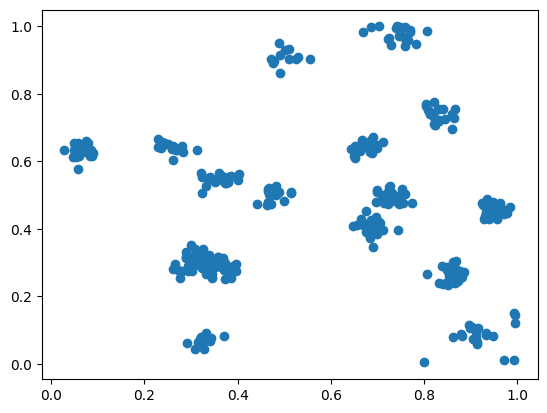

In [314]:
tom_spp = tom.simSPP(25, 20, 0.03, np.array([[1, 0], [0, 1]]), 1.25)
plt.scatter(tom_spp[:,0], tom_spp[:,1])

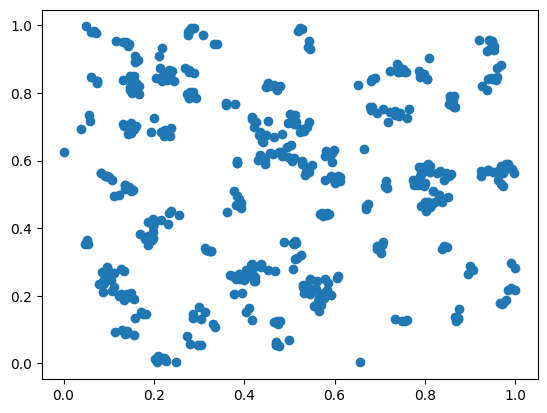

In [294]:
tom_spp = tom.simSPP(100, 5, 0.01, np.array([[1, 0], [0, 1]]), 1.25)
plt.scatter(tom_spp[:,0], tom_spp[:,1])